
<img src="images/5thRST_logo.png" alt="Girl in a jacket" width="900" height="700">

### NOWPAP REMOTE SENSING TRAINING COURSE  

<hr style="border:2px solid rgb(30,70,125)"> </hr>

<span style="font-family:Helvieta; font-size:2em;">Eligio Maure (maure@npec.or.jp)</span>

# Understanding level-2 flag information 

***

<div style="text-align: left"><i> 1.2 Working with swath imagery: level-2 flag information </i></div>

***

In [1]:
# Data manipulation
import numpy as np

# Library import
import h5py 
from netCDF4 import Dataset

# System
import sys
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sys.path.append(Path('sutils').absolute())
import sutils as util

# 1.2.1. Exercise with MODIS-Aqua

In [14]:
# Define and read data (MODIS-Aqua)
nc_file = 'sample_data/A2021097040500.L2_LAC_OC.nc'
with Dataset(nc_file, 'r') as nc:
    lon = nc.groups['navigation_data']['longitude'][:]
    lat = nc.groups['navigation_data']['latitude'][:]
    flags = nc.groups['geophysical_data']['l2_flags'][:]
    chl = np.log10(nc.groups['geophysical_data']['chlor_a'][:])

```javascript
flag_means = {0: 'ATMFAIL',    1: 'LAND',        2: 'PRODWARN', 
              3: 'HIGLINT',    4: 'HILT',        5: 'HISATZEN',
              6: 'COASTZ',     7: 'SPARE',       8: 'STRAYLIGHT', 
              9: 'CLDICE',    10: 'COCCOLITH',  11: 'TURBIDW',
              12: 'HISOLZEN', 13: 'SPARE',      14: 'LOWLW', 
              15: 'CHLFAIL',  16: 'NAVWARN',    17: 'ABSAER', 
              18: 'SPARE',    19: 'MAXAERITER', 20: 'MODGLINT', 
              21: 'CHLWARN',  22: 'ATMWARN',    23: 'SPARE',
              24: 'SEAICE',   25: 'NAVFAIL',    26: 'FILTER', 
              27: 'SPARE',    28: 'BOWTIEDEL',  29: 'HIPOL',
              30: 'PRODFAIL', 31: 'SPARE'};
```

In [4]:
# A function to retrieve the flag-bit
def get_flag_mask(bit: int, l2_flags):
    mask = l2_flags & (1 << bit)
    return np.ma.masked_where(mask==0, mask)

In [18]:
def add_coastline(ax):
    x, y = util.coastline()
    ax.plot(x, y, '-k')
    ax.set_xlim(np.nanmin(x), np.nanmax(x))
    ax.set_ylim(np.nanmin(y), np.nanmax(y))
    return

./sample_data/nowpap_sea.mat
./sample_data/nowpap_sea.mat


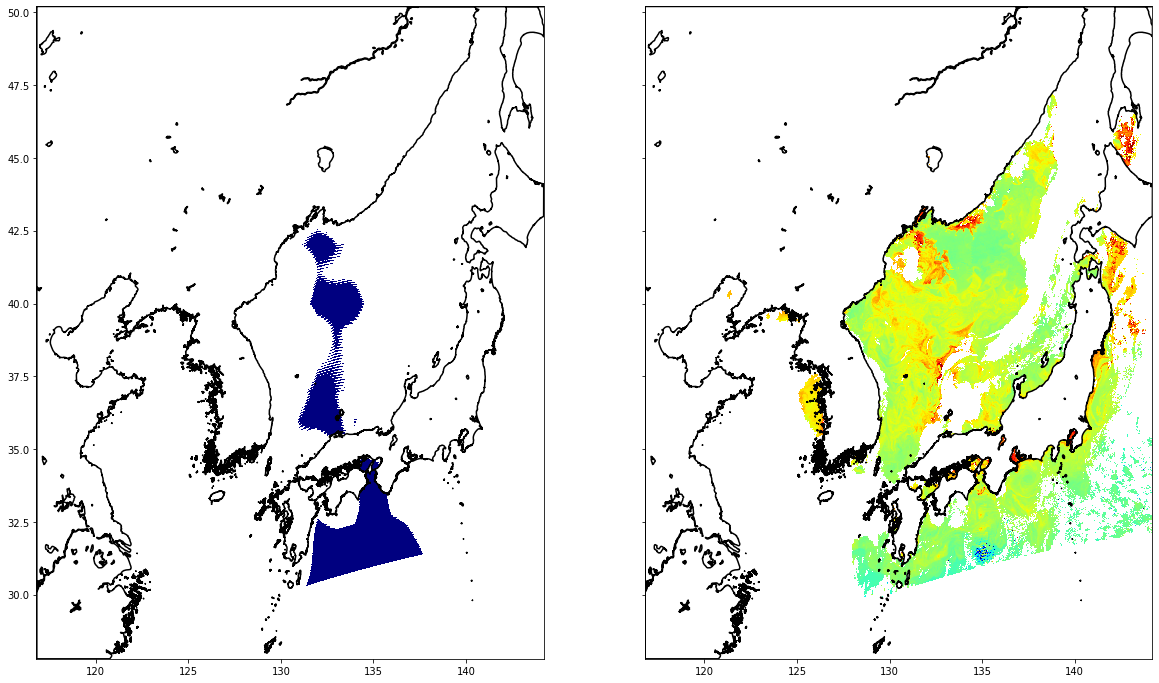

In [19]:
bit = 3
fmask = get_flag_mask(bit=bit, l2_flags=flags); 

fig, ax = plt.subplots(1,2, figsize=(20,12), sharey=True)
ax[0].pcolormesh(lon, lat, fmask, cmap='jet')
ax[1].pcolormesh(lon, lat, chl, cmap='jet')

if bit != 1:
    add_coastline(ax=ax[0])
    add_coastline(ax=ax[1])

# 1.2.2. Exercise with SGLI/GCOM-C

```javascript
flag_means = {0: 'ATMFAIL',    1: 'LAND',        2: 'PRODWARN', 
              3: 'HIGLINT',    4: 'HILT',        5: 'HISATZEN',
              6: 'COASTZ',     7: 'SPARE',       8: 'STRAYLIGHT', 
              9: 'CLDICE',    10: 'COCCOLITH',  11: 'TURBIDW',
              12: 'HISOLZEN', 13: 'SPARE',      14: 'LOWLW', 
              15: 'CHLFAIL',  16: 'NAVWARN',    17: 'ABSAER', 
              18: 'SPARE',    19: 'MAXAERITER', 20: 'MODGLINT', 
              21: 'CHLWARN',  22: 'ATMWARN',    23: 'SPARE',
              24: 'SEAICE',   25: 'NAVFAIL',    26: 'FILTER', 
              27: 'SPARE',    28: 'BOWTIEDEL',  29: 'HIPOL',
              30: 'PRODFAIL', 31: 'SPARE'};
```